### Reading the dataset

In [2]:
import pandas as pd
data = pd.read_csv('SMSSpamCollection',delimiter = '\t',header = None,
                names = ['spam','text'])
data.head(10)

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
data['spam'].value_counts()

,count
spam,
ham,4825
spam,747


### EDA and Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data['spam'] = data['spam'].map({'spam': 1, 'ham': 0})

#### Cleaning the text

In [7]:
!pip install nltk

In [9]:
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', '', text)


    # Tokenization and stemming
    words = word_tokenize(text)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    return ' '.join(words)


data['text'] = data['text'].apply(lambda x: clean_text(x))
data['length'] = data['text'].apply(lambda x:len(str(x)))
data['words'] = data['text'].apply(lambda x:len(str(x).split()))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-9-ddbbcece600f>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


<ipython-input-10-7a401980ab15>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Ham (0)', 'Spam (1)'])


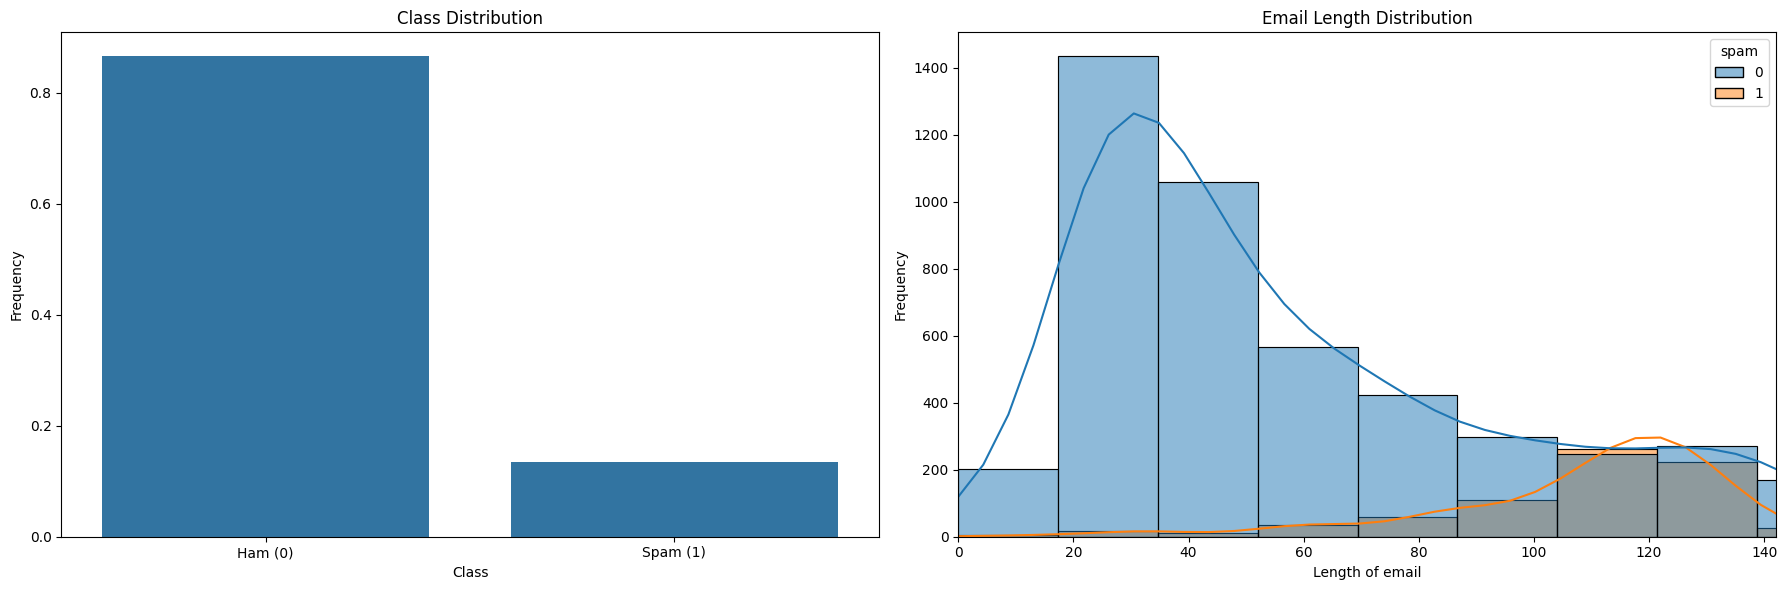

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


class_distribution = data['spam'].value_counts(normalize=True)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=class_distribution.index, y=class_distribution.values, ax=ax[0])
ax[0].set_title('Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(['Ham (0)', 'Spam (1)'])

sns.histplot(data, x='length', hue='spam', bins=50, ax=ax[1], kde=True)
ax[1].set_title('Email Length Distribution')
ax[1].set_xlabel('Length of email')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim(0, data['length'].quantile(0.95))  # Limit to 95th percentile for better visualization

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

X = data[['text', 'length', 'words']]
y = data['spam']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)